In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Все библиотеки, необходимые для работы будут в этой ячейке
import numpy as np
import pandas as pd

# импорт matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics

# **Препроцессинг данных**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset/Копия X_CLEAR.xlsx')

In [ ]:
df.describe().T.style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.4f}')
 # описательная статистика датасета не отшкалированного

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1000.0000,2.9363,0.9088,0.3894,2.3193,2.9088,3.5539,5.5917
"Плотность, кг/м3",1000.0000,1975.4025,72.9537,1784.4822,1923.6287,1977.3210,2021.1595,2192.7388
"модуль упругости, ГПа",1000.0000,738.6755,327.5452,2.4369,500.7730,741.1481,961.6508,1649.4157
"Количество отвердителя, м.%",1000.0000,110.8219,27.8696,29.9561,92.5238,110.6526,129.8531,192.8517
"Содержание эпоксидных групп,%_2",1000.0000,22.2355,2.3842,15.6959,20.5832,22.2215,23.9749,28.9551
"Температура вспышки, С_2",1000.0000,285.9573,40.2315,173.4849,259.1038,285.8540,313.0291,403.6529
"Поверхностная плотность, г/м2",1000.0000,479.8558,277.7086,0.6037,266.9787,450.8695,691.5284,1291.3401
"Модуль упругости при растяжении, ГПа",1000.0000,73.3182,3.1138,64.0541,71.2488,73.2304,75.3266,82.6821
"Прочность при растяжении, МПа",1000.0000,2464.8642,485.0154,1036.8566,2134.5359,2456.3942,2760.1630,3848.4367
"Потребление смолы, г/м2",1000.0000,218.2540,58.9450,41.0483,179.8122,218.6977,257.4748,386.9034


*   **count** - количество
*   **mean** - среднее значение
*   **std** - стандартное отклонение
*   **min** - минимум
*   **25%** - верхнее значение первого квартиля
*   **50%** - медиана (2-й квартиль)
*  **75%** - верхнее значение третьего квартиля
*  **max** - максимум




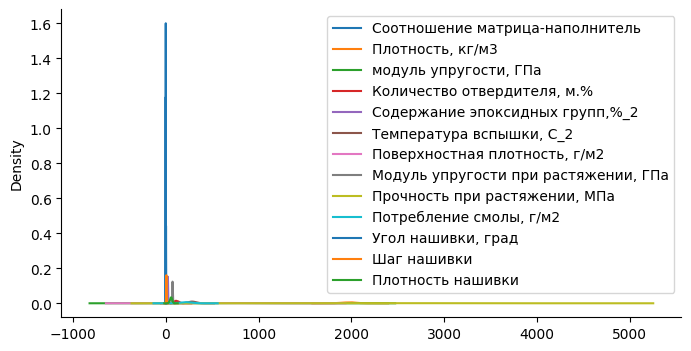

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
df.plot(kind = 'kde', ax = ax)
sns.despine()

**Отношения между переменными показывают, что данные лежат в разных диапазонах. Данные могут вести себя плохо, если отдельные функции не выглядят более или менее как стандартные нормально распределенные.**

Нормализация масштабирует каждую входную переменную до диапазона от нуля до единицы – диапазон значений, где мы имеем наибольшую точность

**Применим масштабирование (стандартизацию) данных.** 

**StandardScaler** преобразует данные таким образом, **чтобы среднее значение каждой переменной было равно 0, а стандартное отклонение равнялось 1, что соответствует стандартному нормальному распределению.** Так как большинство признаков, как показал разведочный анализ данных, стремятся к нормальному распределению.

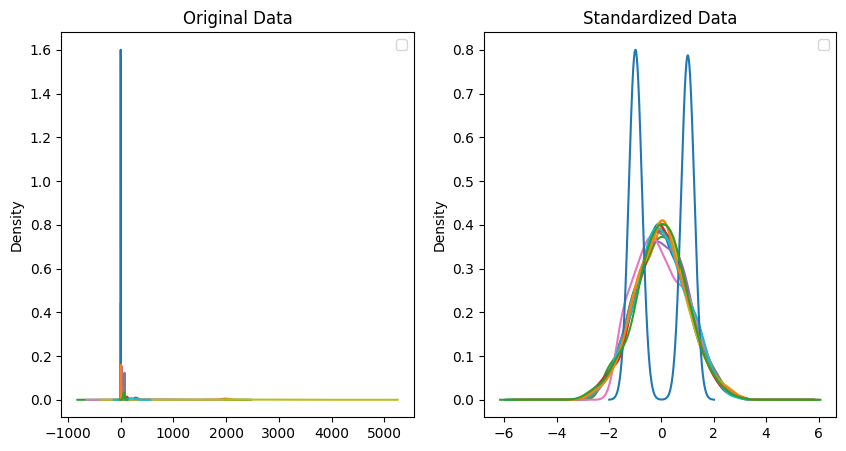

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Построение графика subplots
# Построение графика 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.plot(ax=ax[0], kind = 'kde', title='Original Data')
ax[0].legend(labels=[])
df_std.plot(ax=ax[1], kind = 'kde', title='Standardized Data')
ax[1].legend(labels=[])

plt.show()

In [ ]:
df_std.describe().T.style\
    .set_table_styles([{'selector': 'th.col_heading',
                        'props': [('text-align', 'left')]}])\
    .set_properties(**{'text-align': 'left'})\
    .format('{:.3f}')
# описательная статистика датасета стандартизированного

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1000.000,0.000,1.001,-2.804,-0.679,-0.030,0.680,2.923
"Плотность, кг/м3",1000.000,-0.000,1.001,-2.618,-0.710,0.026,0.628,2.981
"модуль упругости, ГПа",1000.000,0.000,1.001,-2.249,-0.727,0.008,0.681,2.782
"Количество отвердителя, м.%",1000.000,-0.000,1.001,-2.903,-0.657,-0.006,0.683,2.945
"Содержание эпоксидных групп,%_2",1000.000,-0.000,1.001,-2.744,-0.693,-0.006,0.730,2.820
"Температура вспышки, С_2",1000.000,0.000,1.001,-2.797,-0.668,-0.003,0.673,2.927
"Поверхностная плотность, г/м2",1000.000,0.000,1.001,-1.727,-0.767,-0.104,0.763,2.924
"Модуль упругости при растяжении, ГПа",1000.000,0.000,1.001,-2.977,-0.665,-0.028,0.645,3.009
"Прочность при растяжении, МПа",1000.000,-0.000,1.001,-2.946,-0.681,-0.017,0.609,2.854
"Потребление смолы, г/м2",1000.000,-0.000,1.001,-3.008,-0.652,0.008,0.666,2.863


In [ ]:
#получим среднее и медианное значения стандартизованного датасета
mean_and_50 = df_std.describe()
mean_and_50.loc[['mean', '50%']].round(2)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,0.00,-0.00,0.00,-0.00,-0.00,0.0,0.0,0.00,-0.00,-0.00,0.00,0.0,0.00
50%,-0.03,0.03,0.01,-0.01,-0.01,-0.0,-0.1,-0.03,-0.02,0.01,-0.99,0.0,0.02


видим, что данные по среднему и медианному значению имеют слабо выраженные различия, а значит могут быть подвергнуты дальнейшему анализу.

**Препроцессинг данных выполнен в целях демонстрации полученных знаний в обучении. Имеем один подготовленный датасет и три задания, три разных прогноза. В таком случае к стандартизации будем приводить копии исходного датасета, предварительно разделенные на тренировочную и тестовую выборки.*